In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib
import shutil
import os 
import PIL
import tensorflow as tf
from tensorflow import keras  
from keras.models import Sequential,save_model
from keras.layers import Flatten,Dense,Conv2D,MaxPooling2D

In [16]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [17]:
image_count=len(list(data_dir.glob('*/*.jpg')))
print('total no of images',image_count)

total no of images 3670


In [18]:
batch_size=32
img_height =180
img_width =180

In [19]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,validation_split=0.2,subset="training",seed=123,image_size=(img_height, img_width),batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [20]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,  # Specifies the directory containing the validation dataset.
  validation_split=0.2,  # Splits the dataset into training and validation sets. Here, 20% of the data will be used for validation.
  subset="validation",  # Specifies that this dataset is for validation purposes.
  seed=123,  # Sets the seed for reproducibility when splitting the dataset.
  image_size=(img_height, img_width),  # Resizes the images to the specified height and width.
  batch_size=batch_size  # Sets the batch size for the validation dataset.
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [21]:
class_name=train_ds.class_names
print('class name: ',class_name)

class name:  ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [22]:
train_ds=train_ds.cache().shuffle(1000)
val_ds=val_ds.cache()

In [23]:
num_classes=len(class_name)

In [24]:
model=Sequential()
model.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(16,3,padding='same',activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(num_classes))
# Output Dense layer with 'num_classes' neurons (number of output classes).
    # No activation specified here; it's common in multi-class classification to omit activation to get logits.


In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
print('Model Training...')

Model Training...


In [28]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),# 'from_logits=True' specifies that the model outputs logits, not probabilities.
    metrics=['accuracy']
)


In [29]:
history=model.fit(train_ds,epochs=50,validation_data=val_ds)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 233ms/step - accuracy: 0.3024 - loss: 1.8681 - val_accuracy: 0.4564 - val_loss: 1.2522
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 225ms/step - accuracy: 0.5189 - loss: 1.1236 - val_accuracy: 0.6049 - val_loss: 1.0142
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 204ms/step - accuracy: 0.6681 - loss: 0.8944 - val_accuracy: 0.6471 - val_loss: 0.9325
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 204ms/step - accuracy: 0.7323 - loss: 0.7110 - val_accuracy: 0.6471 - val_loss: 0.9270
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 206ms/step - accuracy: 0.8015 - loss: 0.5490 - val_accuracy: 0.6376 - val_loss: 1.0286
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 205ms/step - accuracy: 0.8881 - loss: 0.3349 - val_accuracy: 0.6281 - val_loss: 1.2872
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 204ms/step - accuracy: 0.9274 - loss: 0.2292 - val_accuracy: 0.6444 - val_loss: 1.3456
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 205ms/step - accuracy: 0.9472 - loss: 0.1841 - val_accu

In [30]:
print("Training Complete!")

Training Complete!


In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [34]:
epochs_range = range(50)
# Creates a range of values representing the number of epochs.
# 'epochs_range' is a range object that starts from 0 (the first epoch) and ends at 'epochs - 1'.
# It is often used for setting the x-axis values when plotting metrics against epochs during visualization.

Text(0.5, 1.0, 'Training and Validation Accuracy')

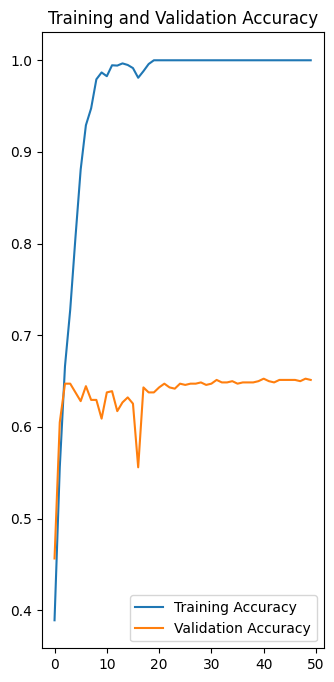

In [35]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

In [36]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.388965,1.483884,0.456403,1.252229
1,0.555518,1.084394,0.604905,1.014227
2,0.666213,0.890774,0.647139,0.932451
3,0.727861,0.717268,0.647139,0.926951
4,0.806540,0.542330,0.637602,1.028637
5,0.880790,0.342358,0.628065,1.287166
6,0.929155,0.223322,0.644414,1.345576
7,0.947548,0.181686,0.629428,1.617807
8,0.979223,0.076318,0.629428,1.737176
9,0.986717,0.059033,0.608992,2.365075


Text(0.5, 1.0, 'Training and Validation Accuracy')

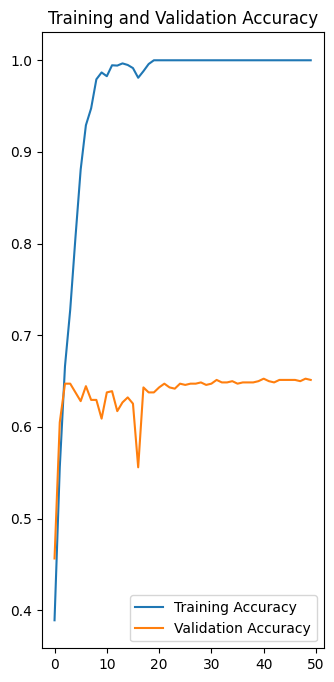

In [39]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

<Axes: >

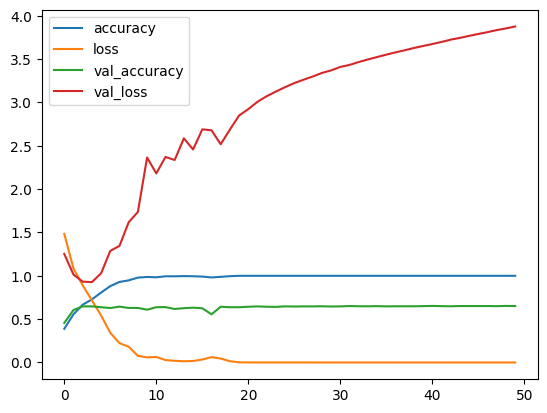

In [37]:
pd.DataFrame(history.history).plot()

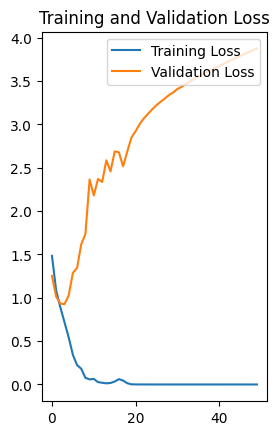

In [40]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [38]:
save_model(model, 'flower_model_trained.hdf5')
print("Model Saved")

Model Saved
